To compare EasyOCR and Keras OCR on the dataset from Kaggle, you can follow the steps below. This code will load the dataset, apply both OCR models to extract text, and then compare their performance based on accuracy or other metrics like speed, F1 score, etc.

Steps:
Install Dependencies: Make sure you have the required libraries installed.
Load Dataset: Load the images from the Kaggle dataset.
Run OCR Models: Use EasyOCR and Keras OCR on the dataset.
Evaluate Performance: Compare the output using metrics such as accuracy or timing.

# Import necessary libraries


In [2]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [3]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.6 MB/s eta 0:00:00:00:01


In [4]:
# Импорт необходименных библиотек
import pandas as pd
import numpy as np
import os

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

import easyocr
from jiwer import cer, wer

# Load the annotation data from CSV and image data from parquet

In [5]:
# Загрузка аннотаций и информации об изображениях
annot = pd.read_csv('/kaggle/input/textocr-text-extraction-from-images-dataset/annot.csv')
imgs = pd.read_parquet('/kaggle/input/textocr-text-extraction-from-images-dataset/img.parquet')

# Загрузка путей к изображениям
images = glob('/kaggle/input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/*.jpg')

# Display first few rows of the annotations and images data

In [6]:
print("Annotations Data:")
print(annot.head())
print("\nImages Data:")
print(imgs.head())

Annotations Data:
   Unnamed: 0                  id          image_id  \
0           0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   
1           1  a4ea732cd3d5948a_2  a4ea732cd3d5948a   
2           2  a4ea732cd3d5948a_3  a4ea732cd3d5948a   
3           3  a4ea732cd3d5948a_4  a4ea732cd3d5948a   
4           4  a4ea732cd3d5948a_5  a4ea732cd3d5948a   

                            bbox  utf8_string  \
0   [525.83, 3.4, 197.64, 33.94]  Performance   
1  [534.67, 64.68, 91.22, 38.19]        Sport   
2  [626.95, 63.62, 96.52, 31.82]        Watch   
3  [577.4, 141.87, 147.13, 43.1]   ...period.   
4  [391.03, 163.9, 60.82, 38.65]            .   

                                              points     area  
0  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  3483.69  
2  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  3071.27  
3  [580.02, 143.61, 724.53, 141.87, 723.66, 184.9...  6341.30  
4  [395.2, 163.9, 451.85, 191.94, 44

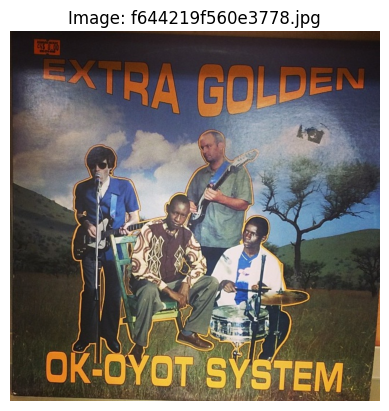

In [ ]:
img_path = images[0]  
image = Image.open(img_path) 
plt.imshow(image) 
plt.axis('off')  
plt.title(f"Image: {img_path.split('/')[-1]}")
plt.show()

In [8]:
# Инициализация EasyOCR с поддержкой английского языка
reader = easyocr.Reader(['en'], gpu=True)

In [9]:
test_img_path = images[0]

try:
    img = Image.open(test_img_path)
    img.verify()  # Проверка целостности
    img = Image.open(test_img_path)
    img_array = np.array(img)
except Exception as e:
    print(f"❌ Изображение повреждено: {test_img_path} | Ошибка: {e}")
    raise
# OCR
ocr_results = reader.readtext(img_array)
pred_text = " ".join([res[1] for res in ocr_results])

print("OCR текст:", pred_text)

OCR текст: E ETRA goLDeN Ok-oyot SYSTEM


# EasyOCR Metric's

In [40]:
def calculate_ocr_metrics(annot, imgs, image_paths, sample_size=1000):
    results = []
    sampled_paths = np.random.choice(image_paths, size=min(sample_size, len(image_paths)), replace=False)

    for img_path in tqdm(sampled_paths, desc="Processing images"):
        try:
            file_name = os.path.basename(img_path)
            img_name_in_imgs = os.path.join('train', file_name)
            img_row = imgs[imgs['file_name'] == img_name_in_imgs]
            if img_row.empty:
                continue
            img_id = img_row['id'].values[0]
            print(f"  ➤ image_id: {img_id}")
            gt_texts = annot[annot['image_id'] == img_id]['utf8_string'].tolist()
            if not gt_texts:
                continue
            gt_text = " ".join(gt_texts).strip()
            if not gt_text:
                continue
            try:
                img = Image.open(img_path)
                img.verify()
                img = Image.open(img_path)
                img_array = np.array(img)
            except Exception as e:
                continue
            ocr_results = easyocr.Reader(['en'], gpu=True).readtext(img_array, detail=0, paragraph=True)
            pred_text = " ".join(ocr_results).strip()
            if not pred_text:
                continue
            def normalize_text(text):
                text = text.lower()
                text = text.translate(str.maketrans('', '', string.punctuation))
                return ' '.join(text.split())

            def soft_normalize(text):
                text = normalize_text(text)
                words = text.split()
                corrected_words = [str(TextBlob(word).correct()) for word in words]
                return ' '.join(corrected_words)

            gt_text_norm = soft_normalize(gt_text)
            pred_text_norm = soft_normalize(pred_text)
            cer_score = cer(gt_text_norm, pred_text_norm)
            wer_score = wer(gt_text_norm, pred_text_norm)
            fuzzy_match = fuzz.token_sort_ratio(gt_text_norm, pred_text_norm) / 100

            results.append({
                'image_id': img_id,
                'image_path': img_path,
                'ground_truth': gt_text,
                'predicted': pred_text,
                'cer': cer_score,
                'wer': wer_score,
                'fuzzy_match': fuzzy_match,
                'text_length': len(gt_text)
            })

        except Exception as e:
            print(f"❌ Ошибка при обработке {img_path}: {str(e)}")

    if not results:
        raise ValueError("Не удалось обработать ни одно изображение. Проверьте данные.")

    return pd.DataFrame(results)

In [41]:
# Вычисляем метрики
metrics_df = calculate_ocr_metrics(annot, imgs, images, sample_size=100)

# Выводим средние метрики
print("Средние метрики:")
print(f"CER: {metrics_df['cer'].mean():.4f}")
print(f"WER: {metrics_df['wer'].mean():.4f}")
print(f"Fuzzy Match: {metrics_df['fuzzy_match'].mean():.4f}")
print(f"Средняя длина текста: {metrics_df['text_length'].mean():.2f} символов")

Processing images:   0%|          | 0/100 [00:00<?, ?it/s]

  ➤ image_id: af7aa209989ddd35
  ➤ image_id: 02dd5502bbd9594e
  ➤ image_id: 6e88918dfbca4854
  ➤ image_id: 9d7c16c396280763
  ➤ image_id: 39acea46df12c6f6
  ➤ image_id: e2a191310d5d1658
  ➤ image_id: 0c3934e412fef1bd
  ➤ image_id: df7cfc51b68b8cb7
  ➤ image_id: 41cea880cc17b9a8
  ➤ image_id: 04ea1b2740f1e892
  ➤ image_id: 04f9cc3db7d8da24
  ➤ image_id: a95f50ad8966539e
  ➤ image_id: 49747a1807318c02
  ➤ image_id: 3c8fe01e3ec3436b
  ➤ image_id: 5e623b74ae15c33c
  ➤ image_id: 008078930b01bc50
  ➤ image_id: 0d23c1e15ea198fc
  ➤ image_id: 0d97811221ffe603
  ➤ image_id: dc3b94b8f742be7e
  ➤ image_id: 09b74cd70d590dc8
  ➤ image_id: 6a06af2def322089
  ➤ image_id: 897e32428d5d3e4f
  ➤ image_id: ffffebddbb8bba21
  ➤ image_id: 42a827ff2e097e3a
  ➤ image_id: d5dab54f1eee6ef4
  ➤ image_id: 3ff1e52db58cacf3
  ➤ image_id: 1ecb24fff08375b0
  ➤ image_id: d059d173f723e1cc
  ➤ image_id: e40ad30f828dfeb7
  ➤ image_id: d98fd2a3c472242a
  ➤ image_id: 994c5519c55223b2
  ➤ image_id: cd7d7c85b4c0d465
  ➤ imag

# Visualisation

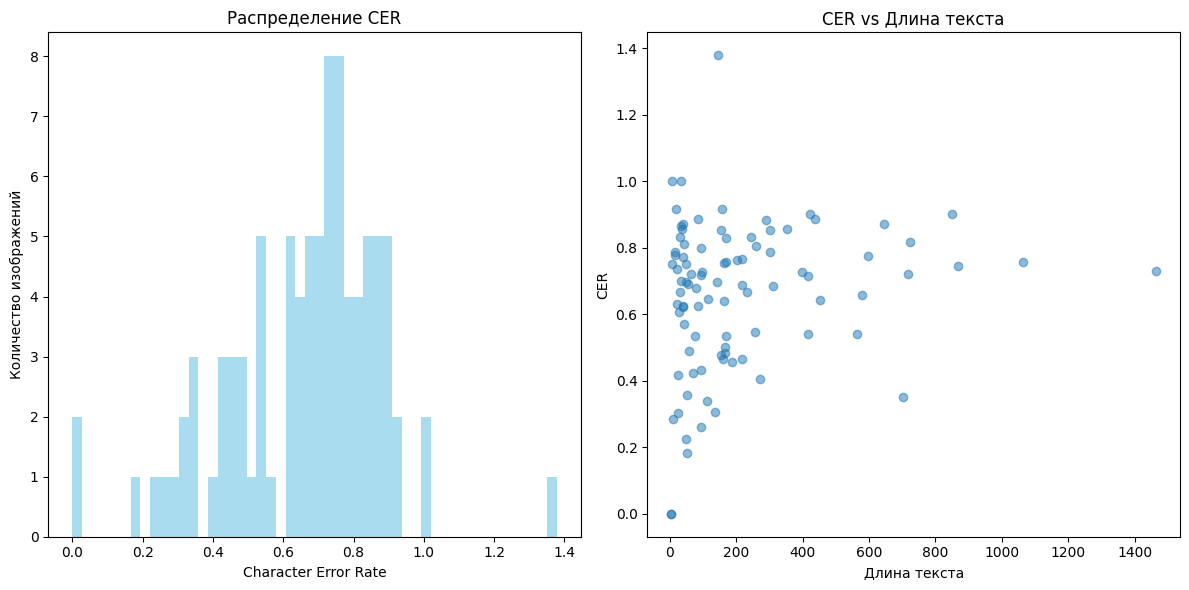


Топ-10 изображений с наибольшими ошибками:
            image_id       cer  \
23  d5dab54f1eee6ef4  1.378378   
69  23dd6cf6215ce987  1.000000   
59  f044e48da26a51e8  1.000000   
58  14f6288f6310c303  0.916667   
52  06dfda67cf22d968  0.915493   
85  0805f13c0f2e4b59  0.902121   
62  41c71aa24ed7835a  0.901163   
79  73429e4b7883f6bd  0.887324   
71  d668743946e88a26  0.887097   
13  3c8fe01e3ec3436b  0.884615   

                                         ground_truth  \
23  . . . . . DOUBLE INSECT PIN& Made in . . . . ....   
69                                             . WMHS   
59                 wilson NCAA 2 . . 2 AN ✓ . ✓ ★ . .   
58                               LIBERTY 2006 . . . .   
52  # * PUNCTION POWER 1 2 3 4 5 6 7 8 9 0 PREV CH...   
85  EM . . . . . . . . . . . . . www.eaglegames.ne...   
62  XL ✓ . . NL . . . . . . . . . . . . . . . De ....   
79  Standard FIREWORKS FIREWORKS Standard SKYWARD ...   
71  6 04 SUN 56 . . G-SHOCK . . . . . . . . G-SHOC...   
13  . . . .

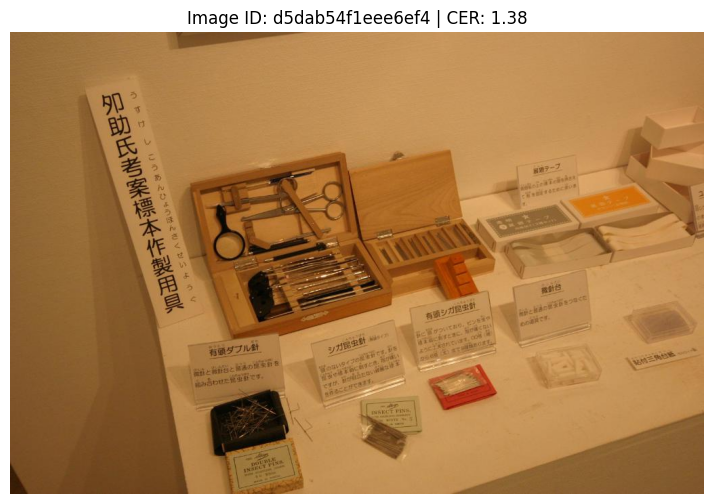

Ground Truth: . . . . . DOUBLE INSECT PIN& Made in . . . . . . INSECT PINS, . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Predicted: 5 3 { : ery7ilm Fi2wibe "46nif e WAcbueeest) 1 HaUUReit 6e WUBRi (hemur
--------------------------------------------------------------------------------


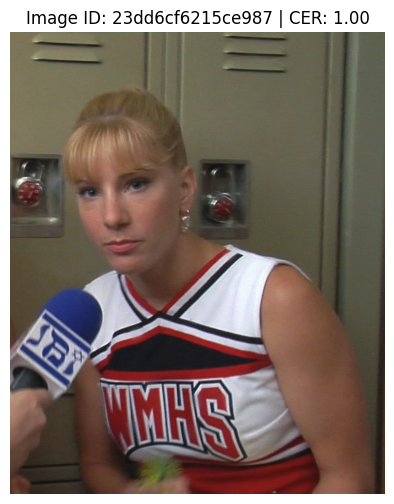

Ground Truth: . WMHS
Predicted: THR
--------------------------------------------------------------------------------


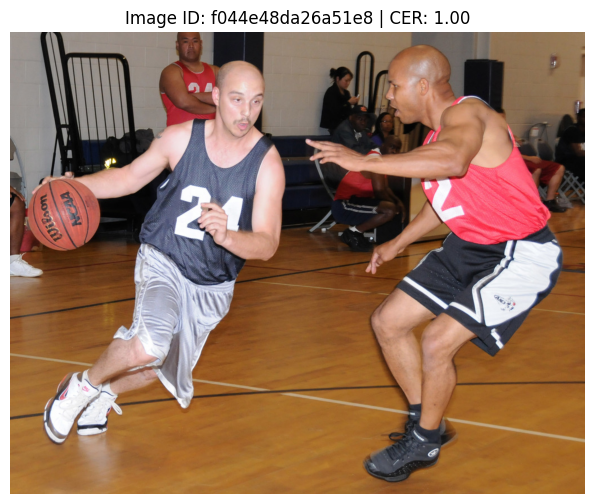

Ground Truth: wilson NCAA 2 . . 2 AN ✓ . ✓ ★ . .
Predicted: {
--------------------------------------------------------------------------------


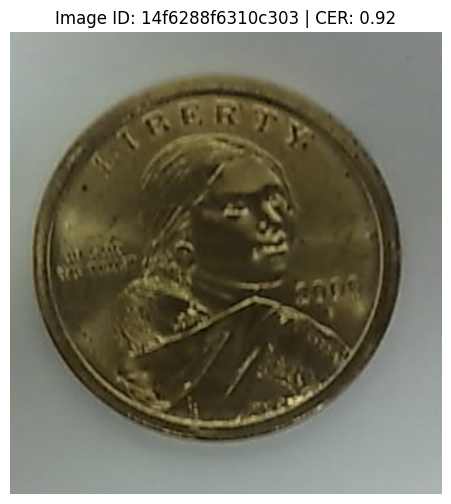

Ground Truth: LIBERTY 2006 . . . .
Predicted: 66TX
--------------------------------------------------------------------------------


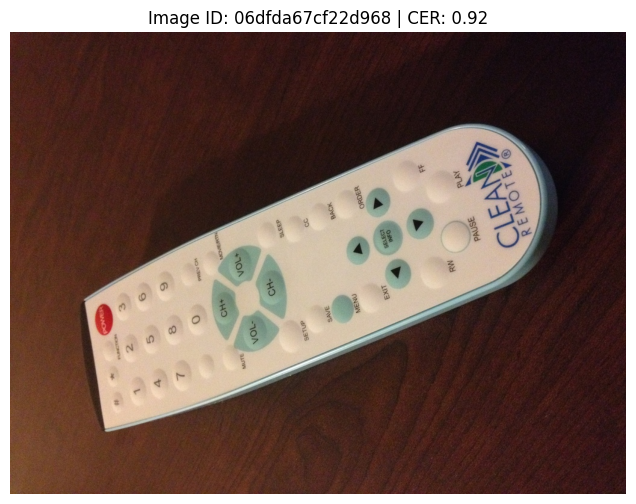

Ground Truth: # * PUNCTION POWER 1 2 3 4 5 6 7 8 9 0 PREV CH CH+ MUTE VOL- VOL+ . CH- SETUP SAVE SLEEP CC BACK MENU EXIT SELECT INFO ORDER RW PAUSE PLAY FF CLEAN REMOTE R
Predicted: 6 2 5 5 2 3 1 1 1 8 1
--------------------------------------------------------------------------------


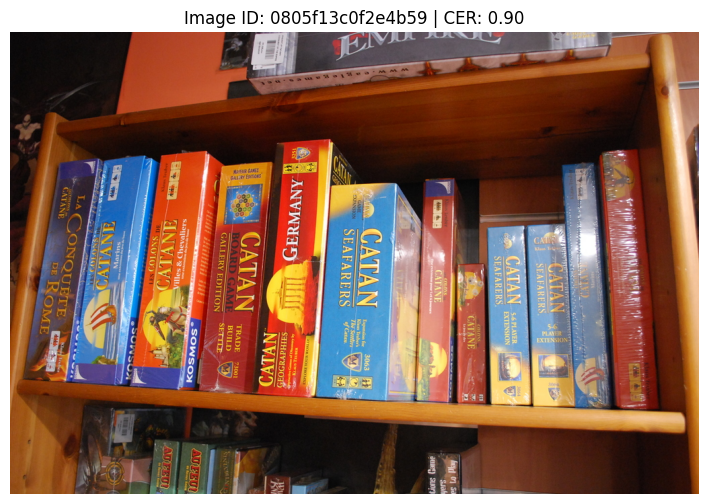

Ground Truth: EM . . . . . . . . . . . . . www.eaglegames.net CATANE . LA CONQUETE DE ROME Klaus Teuber . . . KOSMOS® KOSMOS® LES COLONS DE CATANE Marins . . . . . . LES COLONS DE CATANE Villes &Chevaliers . . . . . . Kluas Teuber . . . . C . . . . . . . . . . . . . . . . . . . . . . . . . MAYFAIR GALLERY EDITIONS GALLERY EDITION BOARD GAME CATAN GERMANY CATAN GEOGRAPHES . German of Dictionary by KLAUS TEUBER . TOUR . . . . 3063 Expantion for Klaus Teuber's The . of Catan CATAN SEAFARERS CATAN GAME EXPANSION CATAN . . . . . . CATANE . COLONS . . COLONS . CATANE . . . . 3064 5-6 PLAYER EXTENSION CATAN SEAFARERS CATA Klaus Teuber CATAN SEAFARERS 5-6 PLAYER EXTENSION 3064 . . CATANE Marins Klaus Teuber tions yers es to Play Game . . . . . . . . AUFEU! . . . AUFEU! . . . . . . . Klaus Teuber . . . . 3251 TRADE BUILD SETTLE 73001 M Klaus Teuber . . . . . . .
Predicted: PNJ a5 Qunz67 Eud 0 i 6 I | J 1 1 Cui J 1 3 9 0 E 1 03 # 1 I1 UN 0 0 1 sso 8 ] U 14 J 9 0 0 9
-----------------------------

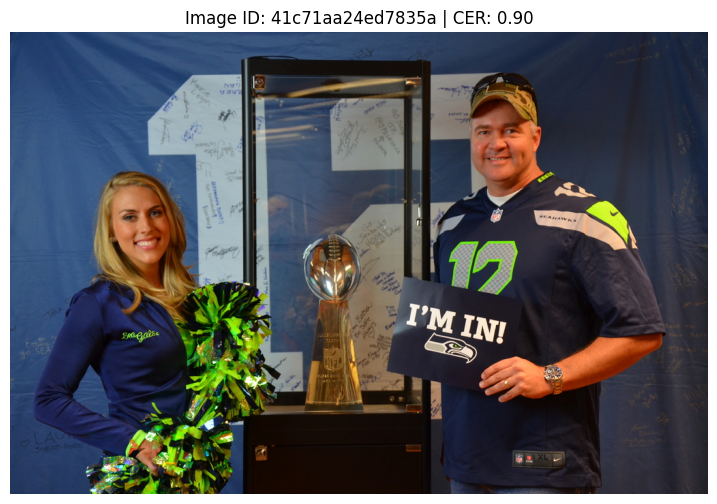

Ground Truth: XL ✓ . . NL . . . . . . . . . . . . . . . De . . . . . . . . . Go . . . . Go . . . . . . . . . . . . . I'M IN! . SEAHAWKS ✓ 12 . . YE . . . Go . J.P. @JPELESASA + . SSG MAG . . GO Seahawks HOOAH . . . NFL . . . . . . . A . . . Be Safe Always . . . . SeaGalse . . . . A . . . . . . . . . . . S. . . . Logan Koskie BARA GAN U . . . . TARA . Emily . go SEA . . LA . SCHEIDT- PADRON A . . . . . . . . . . . . . . . . . . . . .
Predicted: Oiad SenGalse ': ' I'M INI
--------------------------------------------------------------------------------


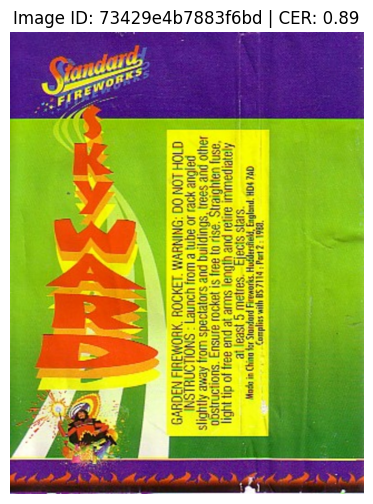

Ground Truth: Standard FIREWORKS FIREWORKS Standard SKYWARD GARDEN FIRWORK. INTRUCTIONS: away slightly from Dustructions. light tip of tree and Ensure at least 5 Made in for Chino Standard Complies with ROCKET. Launch from WARNING: a tube or DO NOT HOLD rack angled spectators rocket and buildings trees and other is free to rise straighten fuse. at arms length and retire immediately metres. Ejects stars. FIREWORKS . England HD$ 7 BS7114: Part2: 1980
Predicted: adug Firewort 238 80 [ 882 U 2 3 04 1 1 4 C J 2 0 9 44 2 0 1 B0 2 57 1 @ 81 E 03 & F 1 3 { D
--------------------------------------------------------------------------------


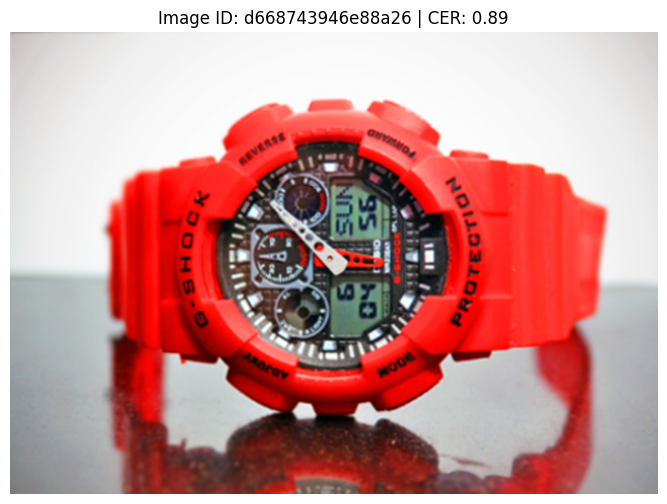

Ground Truth: 6 04 SUN 56 . . G-SHOCK . . . . . . . . G-SHOCK ADJUST MODE PROTECTION FORWARD REVERSE
Predicted: Ko 30 W 6 1 )  3 3
--------------------------------------------------------------------------------


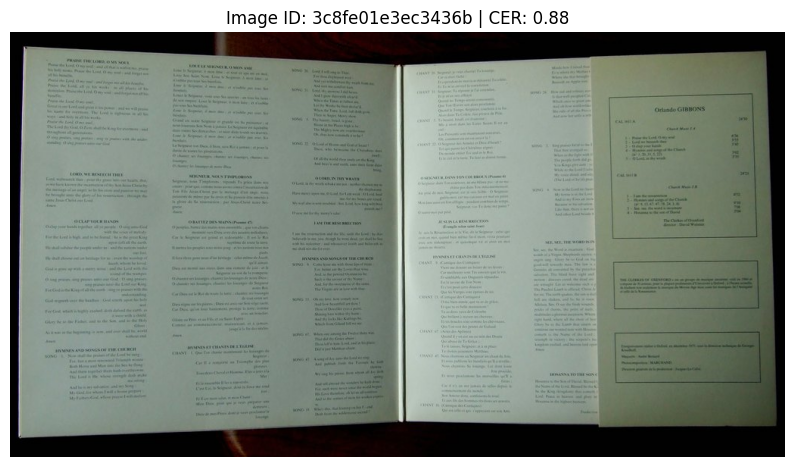

Ground Truth: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . GIBBIONS 1- 2- 3- 4- . 1 2- 3 4- 36
Predicted: (tado GIBBONS
--------------------------------------------------------------------------------


In [43]:
def analyze_results(df):
    # Распределение CER
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df['cer'], bins=50, alpha=0.7, color='skyblue')
    plt.title('Распределение CER')
    plt.xlabel('Character Error Rate')
    plt.ylabel('Количество изображений')

    # CER vs Длина текста
    plt.subplot(1, 2, 2)
    plt.scatter(df['text_length'], df['cer'], alpha=0.5)
    plt.title('CER vs Длина текста')
    plt.xlabel('Длина текста')
    plt.ylabel('CER')
    plt.tight_layout()
    plt.show()

    # Топ 10 ошибок
    top_errors = df.sort_values('cer', ascending=False).head(10)
    print("\nТоп-10 изображений с наибольшими ошибками:")
    print(top_errors[['image_id', 'cer', 'ground_truth', 'predicted']])

    # Примеры ошибок
    for _, row in top_errors.iterrows():
        img = Image.open(row['image_path'])
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.title(f"Image ID: {row['image_id']} | CER: {row['cer']:.2f}")
        plt.axis('off')
        plt.show()

        print(f"Ground Truth: {row['ground_truth']}")
        print(f"Predicted: {row['predicted']}")
        print("-" * 80)

# Анализируем результаты
analyze_results(metrics_df)